In [115]:
#Importando librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import folium
from folium.plugins import HeatMap
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tools.eval_measures import rmse

sns.set(rc={'figure.figsize':(11.7,8.27)})


In [116]:
#Leemos la base 

sismos = pd.read_csv("sismos.csv")

In [117]:
#Dimensiones de nuestra base

sismos.shape

(336, 14)

In [118]:
print("En la provincia de Mendoza durante 2020 hasta la fecha se han registrado {} sismos.".format(sismos.shape[0]))

En la provincia de Mendoza durante 2020 hasta la fecha se han registrado 336 sismos.


In [119]:
print("En este dataset, se obtienen {} variables a analizar por sismo.".format(sismos.shape[1]))

En este dataset, se obtienen 14 variables a analizar por sismo.


In [120]:
#Columnas

sismos.columns

Index(['ID', 'Fecha', 'Hora', 'Latitud', 'Longitud', 'Profundidad', 'Magnitud',
       'Detalle', 'Unnamed: 8', 'Localidad', 'Mapa', 'Is_blank', 'Día Semana',
       'Profundidad Number'],
      dtype='object')

In [121]:
#Primeros valores

sismos.head()

,ID,Fecha,Hora,Latitud,Longitud,Profundidad,Magnitud,Detalle,Unnamed: 8,Localidad,Mapa,Is_blank,Día Semana,Profundidad Number
0,1,17/09/2020,19:54:36,-33.354,-69.023,11 Km.,2.7,NaN,NaN,MENDOZA,mapa,True,4,11
1,2,17/09/2020,19:26:03,-32.829,-68.718,8 Km.,2.7,NaN,NaN,MENDOZA,mapa,True,4,8
2,3,14/09/2020,6:46:19,-34.278,-68.705,15 Km.,3.1,"II a III -San Rafael, Mendoza",NaN,MENDOZA,mapa,False,1,15
3,4,13/09/2020,12:46:46,-33.367,-69.188,138 Km.,2.9,NaN,NaN,MENDOZA,mapa,True,7,138
4,5,12/09/2020,0:46:30,-32.164,-68.466,84 Km.,2.5,NaN,NaN,MENDOZA,mapa,True,6,84


In [122]:
#Ultimos 5 valores 

sismos.tail()

,ID,Fecha,Hora,Latitud,Longitud,Profundidad,Magnitud,Detalle,Unnamed: 8,Localidad,Mapa,Is_blank,Día Semana,Profundidad Number
331,332,03/01/2020,23:10:24,-32.187,-69.336,120 Km.,3.5,NaN,NaN,MENDOZA,mapa,True,5,120
332,333,03/01/2020,22:01:43,-31.970,-69.158,114 Km.,2.7,NaN,NaN,MENDOZA,mapa,True,5,114
333,334,03/01/2020,9:38:01,-33.315,-68.893,17 Km.,2.5,NaN,NaN,MENDOZA,mapa,True,5,17
334,335,01/01/2020,20:34:51,-32.782,-68.889,10 Km.,3.6,"III -Las Heras, Mendoza; III -Ciudad de Mendoz...",NaN,MENDOZA,mapa,False,3,10
335,336,01/01/2020,14:35:03,-33.581,-68.830,6 Km.,2.5,NaN,NaN,MENDOZA,mapa,True,3,6


In [123]:
#Valores nulos 

sismos.isnull().sum()

ID                      0
Fecha                   0
Hora                    0
Latitud                 0
Longitud                0
Profundidad             0
Magnitud                0
Detalle               289
Unnamed: 8            336
Localidad               0
Mapa                    0
Is_blank                0
Día Semana              0
Profundidad Number      0
dtype: int64

<font color= red>Se eliminan columnas que no nos interesan en el estudio</font>

In [124]:
#Eliminando columnas

sismos.drop(columns = ['Detalle', 'Profundidad', 'Unnamed: 8', 'Localidad', 'Mapa'], inplace = True)

In [125]:
sismos.columns

Index(['ID', 'Fecha', 'Hora', 'Latitud', 'Longitud', 'Magnitud', 'Is_blank',
       'Día Semana', 'Profundidad Number'],
      dtype='object')

In [127]:
columnas = ['id', 'fecha', 'hora', 'latitud', 'longitud','magnitud','sismo_sentido', 
            'dia_semana', 'profundidad']

sismos.columns = columnas


In [129]:
#Cantidad de sismos sentidos y no sentidos 

sismos['sismo_sentido'] = sismos['sismo_sentido'].map({True: "no sentido", False: "sentido"})

sismos['sismo_sentido'].value_counts()

no sentido    289
sentido        47
Name: sismo_sentido, dtype: int64

In [130]:
#Porcentaje de sismos sentidos y no sentidos

sismos['sismo_sentido'].value_counts(normalize = True)

no sentido    0.860119
sentido       0.139881
Name: sismo_sentido, dtype: float64

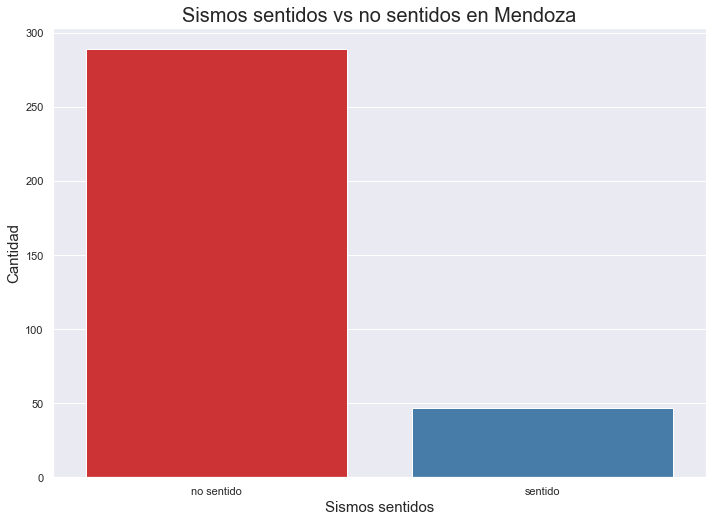

In [131]:
#Visualización de sismos sentidos vs no sentidos

sns.countplot(x = 'sismo_sentido', data = sismos, palette="Set1")
plt.title('Sismos sentidos vs no sentidos en Mendoza', fontsize = 20)
plt.xlabel('Sismos sentidos', fontsize = 15)
plt.ylabel('Cantidad', fontsize = 15)
plt.show()

In [132]:
#Averiguando profundidades: estadística descriptiva 

sismos['profundidad'].describe()

count    336.000000
mean      68.943452
std       62.040332
min        0.000000
25%       12.000000
50%       29.000000
75%      124.250000
max      235.000000
Name: profundidad, dtype: float64

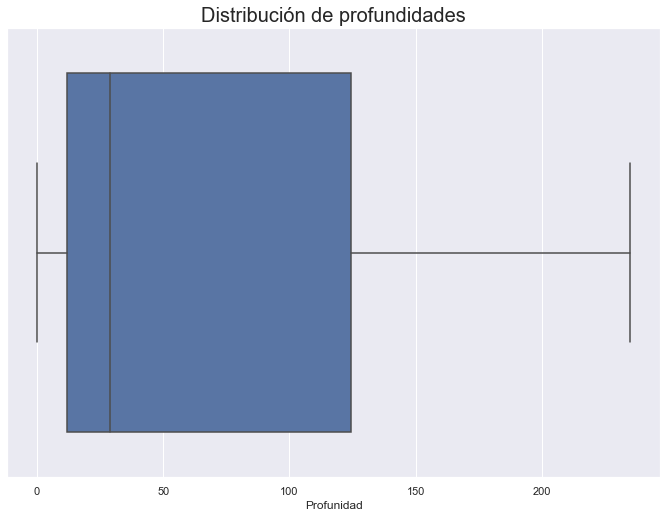

In [133]:
sns.boxplot(sismos['profundidad'])
plt.title('Distribución de profundidades', fontsize = 20)
plt.xlabel('Profunidad')
plt.show()

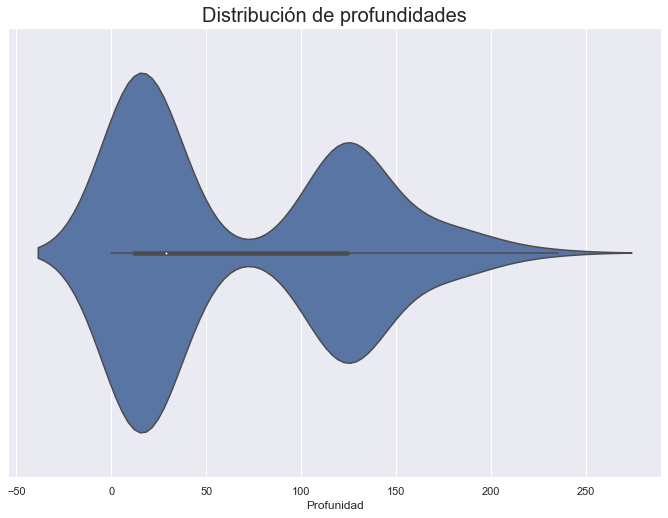

In [136]:
sns.violinplot(sismos['profundidad'])
plt.title('Distribución de profundidades', fontsize = 20)
plt.xlabel('Profunidad')
plt.show()

In [137]:
#El sismo más profundo 

sismos[sismos['profundidad'] == 235]

,id,fecha,hora,latitud,longitud,magnitud,sismo_sentido,dia_semana,profundidad
220,221,09/04/2020,6:52:18,-33.063,-67.737,2.6,no sentido,4,235


In [138]:
#El sismo más superficial

sismos[sismos['profundidad'] == 0]

,id,fecha,hora,latitud,longitud,magnitud,sismo_sentido,dia_semana,profundidad
175,176,12/05/2020,2:48:20,-32.153,-68.3,2.5,no sentido,2,0


In [140]:
#Mapeando los dias de la semana 

sismos['dia_semana'] = sismos['dia_semana'].map({1:'lunes', 2:'martes', 3: 'miércoles', 4: 'jueves',
                                                5: 'viernes', 6: 'sábado', 7: 'domingo'})

In [142]:
sismos['dia_semana'].value_counts()

jueves       58
lunes        52
domingo      48
miércoles    48
viernes      46
sábado       46
martes       38
Name: dia_semana, dtype: int64

In [143]:
sismos['dia_semana'].value_counts(normalize = True)

jueves       0.172619
lunes        0.154762
domingo      0.142857
miércoles    0.142857
viernes      0.136905
sábado       0.136905
martes       0.113095
Name: dia_semana, dtype: float64

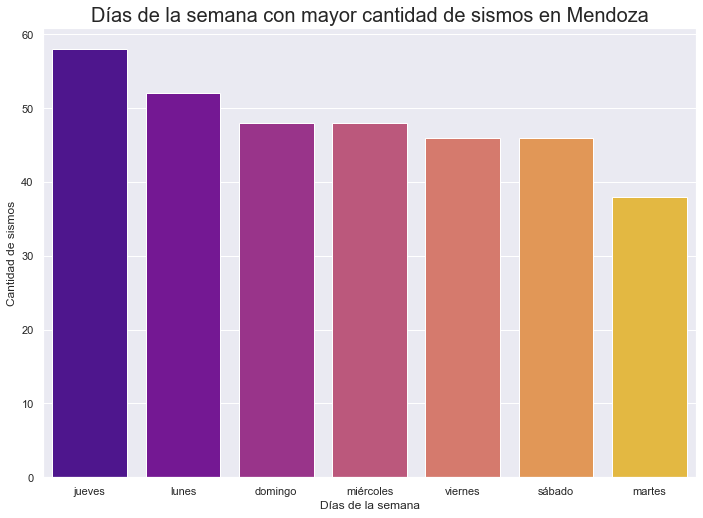

In [144]:
#Dia Semana

sns.countplot(x = "dia_semana", data = sismos, order = sismos['dia_semana'].value_counts().index, palette="plasma")
plt.title('Días de la semana con mayor cantidad de sismos en Mendoza', fontsize = 20)
plt.xlabel('Días de la semana')
plt.ylabel('Cantidad de sismos')
plt.show()

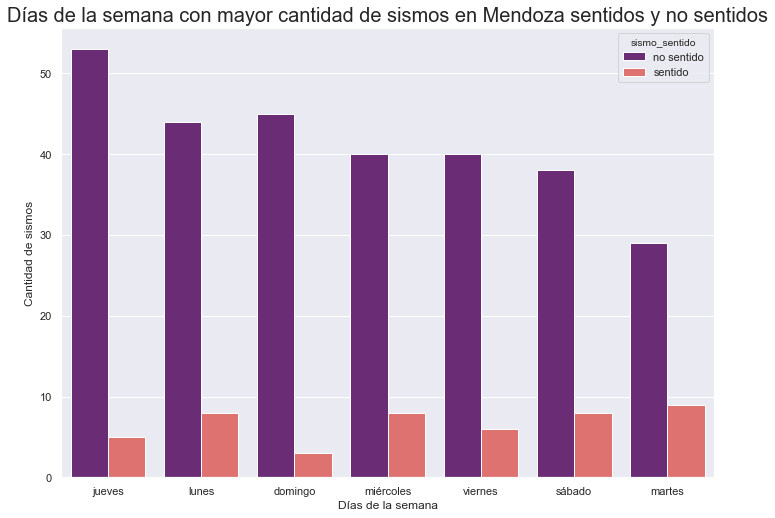

In [146]:
#Grafico Día de semana

sns.countplot(x = "dia_semana", data = sismos, order = sismos['dia_semana'].value_counts().index, palette="magma",
             hue = "sismo_sentido")
plt.title('Días de la semana con mayor cantidad de sismos en Mendoza sentidos y no sentidos', fontsize = 20)
plt.xlabel('Días de la semana')
plt.ylabel('Cantidad de sismos')
plt.show()

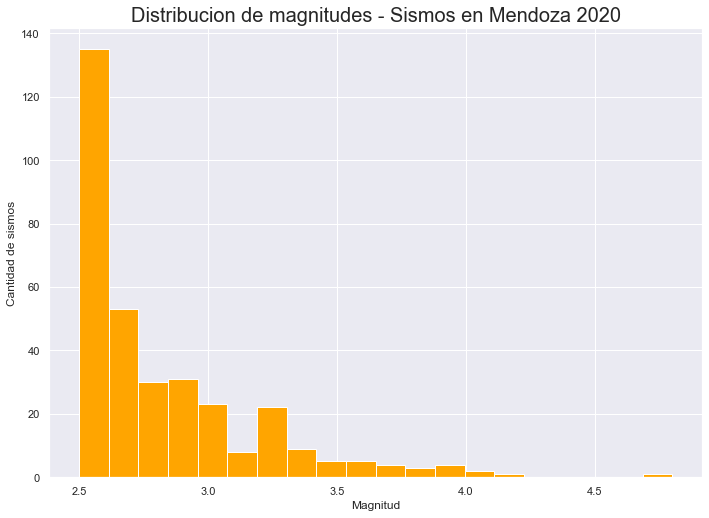

In [158]:
#Magnitud 

plt.hist(sismos['magnitud'], bins = 20, color = "orange")
plt.title("Distribucion de magnitudes - Sismos en Mendoza 2020", fontsize = 20)
plt.xlabel('Magnitud')
plt.ylabel("Cantidad de sismos")
plt.show()

In [163]:
#Analisis de hora

sismos['solo_hora'] = sismos['hora'].str[0:2]

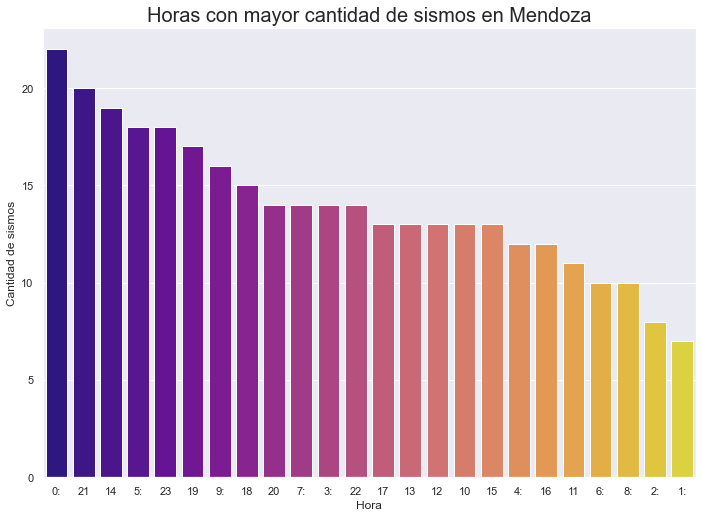

In [167]:
#Dia Semana

sns.countplot(x = "solo_hora", data = sismos, order = sismos['solo_hora'].value_counts().index, palette="plasma")
plt.title('Horas con mayor cantidad de sismos en Mendoza', fontsize = 20)
plt.xlabel('Hora')
plt.ylabel('Cantidad de sismos')
plt.show()

### Representación en mapa

In [168]:
mdz_white=folium.Map(location=[-34.1931714, -69.2631543],
                tiles='openstreetmap', zoom_start=7)

In [169]:
display(mdz_white)

In [170]:
latitud = list(sismos['latitud'])
longitud = list(sismos['longitud'])

In [171]:
for i in range(len(latitud)):
    folium.Marker([float(latitud[i]), float(longitud[i])],popup='Sismo registrado',
                   icon=folium.Icon(color='red')).add_to(mdz_white)

In [172]:
display(mdz_white)

In [173]:
heat_df = sismos[['latitud', 'longitud']]


In [174]:
heat_data = [[row['latitud'],row['longitud']] for index, row in heat_df.iterrows()]


In [175]:
mapa = folium.Map(location=[-34.1931714, -69.2631543],
                    zoom_start =7)
HeatMap(heat_data).add_to(mapa)

In [176]:
mapa

In [177]:
mapa.save('mapa_calor.png')
mdz_white.save('mapa.png')